In [54]:
## Make markers

import cv2
import cv2.aruco as aruco
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

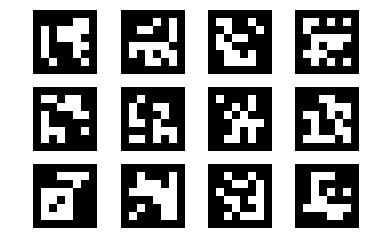

Print these!
Take a picture!


In [3]:
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)

fig = plt.figure()
nx = 4
ny = 3
for i in range(1, nx*ny+1):
    ax = fig.add_subplot(ny,nx, i)
    img = aruco.drawMarker(aruco_dict,i, 700)
    plt.imshow(img, cmap = cm.gray, interpolation = "nearest")
    ax.axis("off")

plt.savefig("markers.pdf")
plt.show()

print('Print these!')
print('Take a picture!')

In [ ]:
frame = cv2.imread("tags.png")
plt.figure()
plt.imshow(frame)
plt.show()

In [ ]:
%%time
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

In [ ]:
plt.figure()
plt.imshow(frame_markers)
for i in range(len(ids)):
    c = corners[i][0]
    plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "o", label = "id={0}".format(ids[i]))
#plt.legend()
plt.show()

In [31]:
## This works! 
## It needs to identify by ID, but that will be fairly easy. 
## I can practice this, but pretty quickly I should start working in the real space. 
## There will likely be some parameter and environmental tuning...

screen_cap = cv2.VideoCapture(0)
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)
parameters = aruco.DetectorParameters_create()
import time

draw = True
t_start = time.time()
t_end = t_start + 15
while time.time() < t_end:
    ret, frame = screen_cap.read()
    #frame = cv2.imread('tags.png')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
    frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

    if len(corners) == 12 and draw == True:
        x0,y0 = tuple(corners[np.where(ids == 1)[0][0]][0,0])
        x1 = corners[np.where(ids == 12)[0][0]][0,0,0]
        y1 = corners[np.where(ids == 5)[0][0]][0,0,1]
        y2 = corners[np.where(ids == 10)[0][0]][0,0,1]
        x2 = corners[np.where(ids == 2)[0][0]][0,0,0]
        y3 = corners[np.where(ids == 9)[0][0]][0,0,1]
        x3 = corners[np.where(ids == 8)[0][0]][0,0,0]
        cv2.rectangle(frame_markers,(x0,y0),(x1,y1),[255,0,0],2)  #1
        cv2.rectangle(frame_markers, (x0,y1),(x1,y2),[0,255,0],2)  #2
        cv2.rectangle(frame_markers, (x0,y2),(x1,y3),[0,0,255],2)  #3
        cv2.rectangle(frame_markers, (x1,y0),(x2,y1),[255,0,255],2)  #4
        cv2.rectangle(frame_markers, (x1,y1),(x2,y2),[255,255,0],2)  #5
        cv2.rectangle(frame_markers, (x1,y2),(x2,y3),[0,255,255],2)  #6
        cv2.rectangle(frame_markers, (x2,y0),(x3,y1),[255,255,255],2)  #7
        cv2.rectangle(frame_markers, (x2,y1),(x3,y2),[0,0,0],2)  #8
        cv2.rectangle(frame_markers, (x2,y2),(x3,y3),[0,255,0],2)  #9
        
    cv2.imshow('',frame_markers),
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break

screen_cap.release()
cv2.destroyAllWindows()



In [53]:
for i in ids:
    print(i[0])
    corner_index = np.where(ids == i)[0][0]
    print(tuple(corners[corner_index][0][0]))

9
(208.0, 405.0)
6
(389.0, 398.0)
11
(481.0, 397.0)
10
(243.0, 308.0)
5
(243.0, 210.0)
12
(335.0, 143.0)
7
(331.0, 406.0)
4
(512.0, 312.0)
3
(501.0, 215.0)
2
(389.0, 149.0)
8
(473.0, 147.0)
1
(219.0, 136.0)


In [ ]:
# Turn on all the cameras

# Check that everything looks good
#  (lights on, cameras on, if doing markers, markers detected)
# - If anything is broken, save a log explaining what's wrong

# Watch for movement (once still for 2 minutes, move on)
# - If after 15 minutes nothing is still, save a log explaining what's wrong 

# Figure out which song to play

# Start recording (wait 10 seconds) 
# Play Song

# Stop Recording
# Close cameras
# Save Video

# Check to make sure everything worked, if it did, save it to the log

# Close everything out.

In [4]:
import cv2
import cv2.aruco as aruco
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

cap = cv2.VideoCapture(4)

while True:
    ret, frame = cap.read()
    if ret == False:
        print('skipping...')
        continue
    cv2.imshow('0',frame)
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break
        
for c in range(4):
    cap.release()
cv2.destroyAllWindows()

In [58]:
import cv2
import cv2.aruco as aruco
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

n_cameras = 4
caps = [[]] * 4
for c in range(n_cameras):
    caps[c] = cv2.VideoCapture(c)

t_start = time.time()
t_end = t_start + 60
while time.time() < t_end:
    for c in range(4):
        ret, frame = caps[c].read()
        cv2.imshow(str(c),frame)
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break
        
for c in range(4):
    caps[c].release()
cv2.destroyAllWindows()




In [ ]:
test = [ * 4
test_copy = np.copy(test)
test[0] = 2
print(test,test_copy)

In [3]:
screen_cap.release()

cv2.destroyAllWindows()

In [ ]:
## This also works, and detecting motion is the right approach. 
#(how long should they be relatively still? 1 minute)
#(how still is relatively still?)

#screen_cap = cv2.VideoCapture('./low_cages.mov')
screen_cap = cv2.VideoCapture(0)

aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)
parameters =  aruco.DetectorParameters_create()

ret0, frame0 = screen_cap.read()
gray0 = cv2.cvtColor(frame0, cv2.COLOR_BGR2GRAY)

kernel = np.ones((5,5),np.float32)/25

fourcc = cv2.VideoWriter_fourcc(*'MJPG')
out1 = cv2.VideoWriter('output3.avi',fourcc, 20.0, (640,480))

while True:
    ret1, frame1 = screen_cap.read()
    #frame = cv2.imread('tags.png')
    if ret1 == True:
        gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    else:
        continue
    dst = cv2.filter2D(gray1,-1,kernel)
    
    dif = cv2.absdiff(gray1,gray0)
    #dif = gray1 - gray0
    #pdb.set_trace()
    dif = np.abs(dif)
    dif[dif < 5] = 0
    
    out1.write(dif)
    motion = str(np.round(np.log(np.sum(dif)),2))
    cv2.putText(dif,motion,(10,450),cv2.FONT_HERSHEY_SIMPLEX,1,255)
    cv2.imshow('Motion',dif)
    cv2.imshow('Original',frame1)
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break
    gray0 = np.copy(gray1)

screen_cap.release()
out1.release()
cv2.destroyAllWindows()

In [ ]:
## Id's 1, 4, 9, 12 are the corners, let's build a better image: 
%matplotlib notebook

img = cv2.imread('trial_run0.png')
plt.imshow(img)


In [ ]:
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)
parameters =  aruco.DetectorParameters_create()
frame = cv2.imread('tags.png')

while True:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
    frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)
    if len(corners) > 1:
        corner1, corner2 = corners[0],corners[1]
        top_left = corner1[0][0]
        bottom_right = corner2[0][2]
        midpoint = np.mean([top_left,bottom_right],0)
        cv2.circle(frame_markers, tuple(midpoint),10,(255,0,0),thickness=10)
    cv2.imshow('',frame_markers)
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

In [6]:
x0,y0 = tuple(corners[1][0,0])
x1 = corners[12][0,0,0]
y1 = corners[5][0,0,1]
y2 = corners[10][0,0,1]
x2 = corners[2][0,0,0]
y3 = corners[9][0,0,1]
x3 = corners[8][0,0,0]

array([255., 215.], dtype=float32)

In [6]:
draw

False